In [ ]:
import numpy as np
from Finder_1d import Finder_1d
import glob,os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
basefolder = '/Users/andreas/Documents/NoiseRecognizer_WorkingVersion/';
foldername = 'Datasets_Cluster_Analysis_Showtime_2020';

In [33]:
def PlotScatter(XC_,labels=[],ax=[],filename=[]):

    if(len(labels)==0):
        labels = -1*np.ones((len(XC_),));
 
    if(ax==[]):
        fig,ax = plt.subplots(1,1,figsize=(10,10)); 
       
    mark_ = (labels==-1);
    ax.scatter(x=XC_[mark_,0],y=XC_[mark_,1],s=3,c='grey',alpha=0.6);

    mark_ = (labels>=0);
    sns.scatterplot(x=XC_[mark_,0],y=XC_[mark_,1],hue=labels[mark_],palette='deep',linewidth=0,
                    s=10,legend=False,ax=ax);
    ax.set_aspect('equal');
    if(not(filename == [])):
        plt.savefig(filename,bbox_inches="tight");


In [34]:
#XC_test = np.loadtxt(basefolder+foldername+'/Template_folder/X_challenge.csv',delimiter=',');

In [35]:
filelist = sorted(glob.glob(basefolder+foldername+"/*.csv"));

Analysing 5625 points
Boundaries for sigma    : 44.848312804625614 , 316.0138182473965
Progress: |██████████████████████████████████████████████████| 100.0% Complete Complete
Computing clusters : 15.32
Postprocessing..
Comp time Step 1 (set boundaries): 0.02 seconds
Comp time Step 2 (clustering): 15.32 seconds
Comp time Step 3 (postprocessing): 3.06 seconds
Selected parameters: sigma                                                      44.848313
threshold                                                        9.0
labels             [0, 1, -1, 2, -1, 3, 4, 5, 6, -1, -1, 7, 8, -1...
time                                                        0.030955
no_clusters                                                      364
similarityScore                                                  NaN
Name: 6, dtype: object


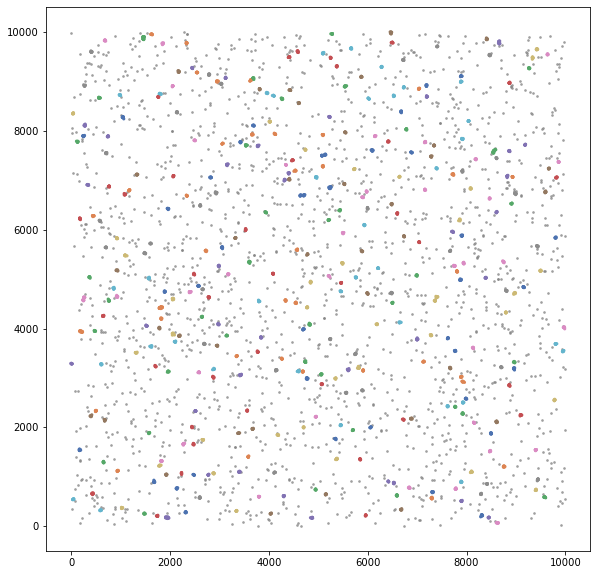

In [36]:
for file in filelist[:10]:
    XC = np.loadtxt(file,delimiter=',');
    XC = XC[:,:2];
    if(len(XC)<20000):
        FD      = Finder_1d();
        labels  = FD.fit(XC,skipSimilarityScore=True);   
        PlotScatter(XC,labels,filename=file[:-4]+'_clusters.pdf');
    else:
        print(len(XC))
        